In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import cv2
import os
from os.path import isfile, join


<h2>O
    riginal Image</h2>

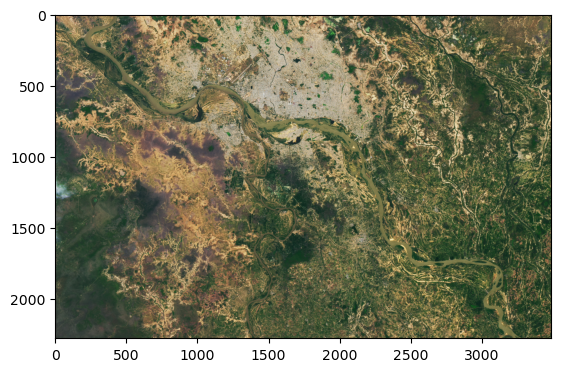

In [4]:
rgb_image=plt.imread("rgb.jpg")
plt.imshow(rgb_image)

Text(0.5, 1.0, 'cropped image')

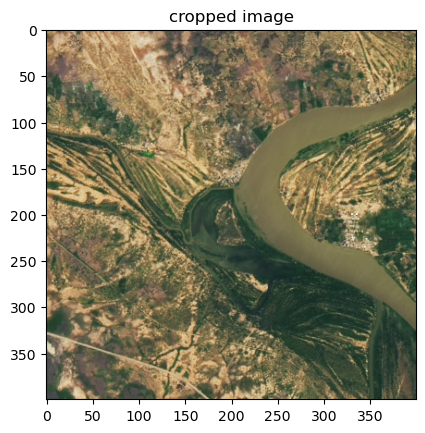

In [6]:
def cut_image(img,x,y,t1,t2):
    return img[x:t1+x,y:t2+y,:]

def save_image(img,name,format="png"):
    im = Image.fromarray(img)
    im.save(f"{name}."+format)


cutted_image=cut_image(rgb_image,0,0,400,400)

plt.imshow(cutted_image)
plt.title("cropped image")


In [7]:
save_image(cutted_image,"my_image","png")
save_image(cutted_image,"my_image","jpeg")
save_image(cutted_image,"my_image","bmp")
save_image(cutted_image,"my_image","tiff")
save_image(cutted_image,"my_image","gif")

Taille image format png: 329.62 KB


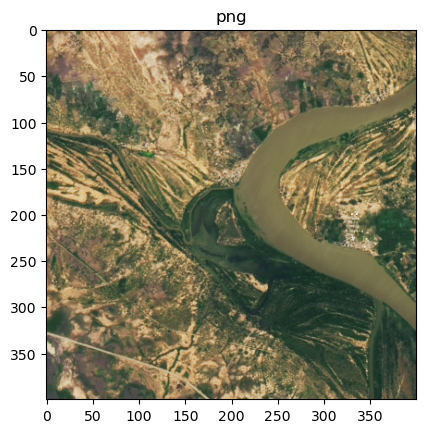

In [8]:

files = [f for f in os.listdir(".") if isfile(join(".", f)) and f.split(".")[0]=="my_image" ]

png_image=plt.imread(files[0])
plt.title(files[0].split(".")[1])
plt.imshow(png_image)
print("Taille image format png:", round(os.stat(files[0]).st_size/(1024),2),"KB")


Taille image format bmp: 468.8 KB


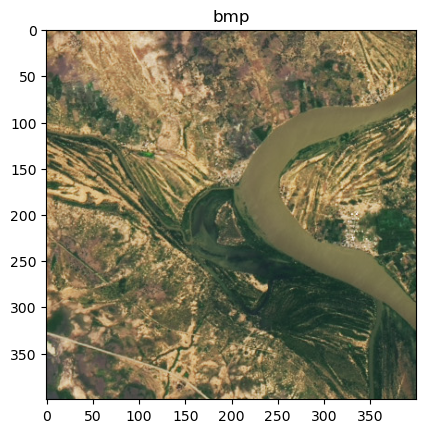

In [9]:
bmp_img=plt.imread(files[1])
plt.title(files[1].split(".")[1])
plt.imshow(bmp_img)
print("Taille image format bmp:", round(os.stat(files[1]).st_size/(1024),2),"KB")


Taille image format gif: 167.46 KB


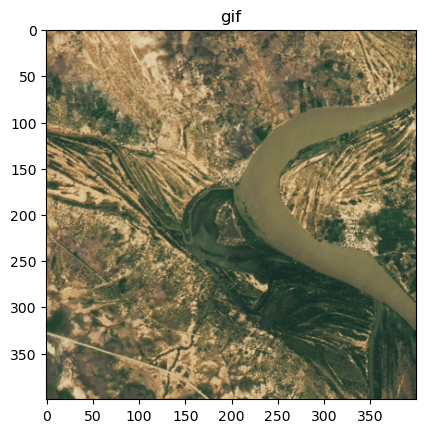

In [10]:
gif_img=plt.imread(files[2])
plt.title(files[2].split(".")[1])
plt.imshow(gif_img)
print("Taille image format gif:", round(os.stat(files[2]).st_size/(1024),2),"KB")
gif_img=gif_img[:,:,:3]


Taille image format tiff: 468.89 KB


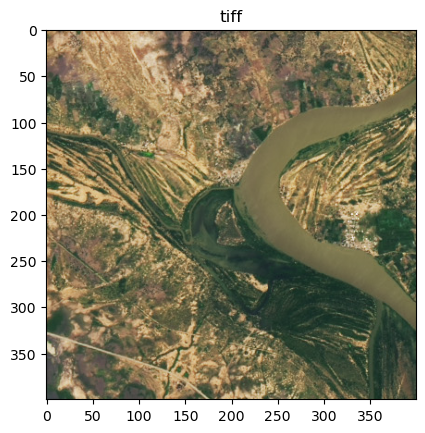

In [11]:
tiff_img=plt.imread(files[3])
plt.title(files[3].split(".")[1])
plt.imshow(tiff_img)
print("Taille image format tiff:", round(os.stat(files[3]).st_size/(1024),2),"KB")


Taille image format jpeg: 39.12 KB


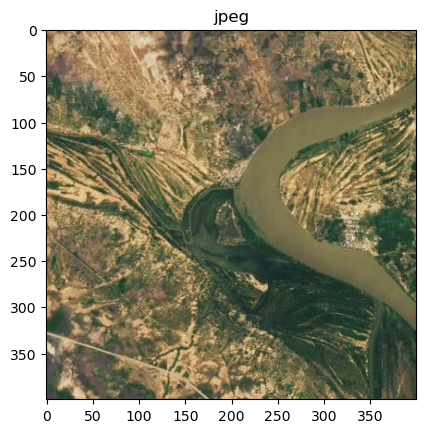

In [12]:
jpeg_img=plt.imread(files[4])
plt.title(files[4].split(".")[1])
plt.imshow(jpeg_img)
print("Taille image format jpeg:", round(os.stat(files[4]).st_size/(1024),2),"KB")


<ul>
<li>Taille image format png: 329.62 KB</li>
<li>Taille image format bmp: 468.8 KB</li>
<li>Taille image format gif: 167.46 KB</li>
<li>Taille image format tiff: 468.89 KB</li>
<li>Taille image format jpeg: 39.12 KB</li>

</ul>
<p>
We can see that the size of the bmp,tiff,png images are larger, but give us more quality as they are 
a lossless type of compression (tiff & png), as compered to jpeg and gif images, which are small in size
but have low image quality as they use  lossy compression.  </p>

<h3>Mean squared error:</h3>

In [13]:
def mean_squard_error(refrence,to_compare):
   return np.square(refrence-to_compare).mean()

print("mse(png,jpeg):",mean_squard_error(png_image*255,jpeg_img))  
print("mse(png,bmp):",mean_squard_error(png_image*255,bmp_img))  
print("mse(png,tiff):",mean_squard_error(png_image*255,tiff_img))  
print("mse(png,gif):",mean_squard_error(png_image*255,gif_img))  


mse(png,jpeg): 45.50909
mse(png,bmp): 0.0
mse(png,tiff): 0.0
mse(png,gif): 10.064442


By analysing the result of the mean squard error  applied to each image, it is clear that bmp and tiff images have 0 error as they use a lossless compression technique. In contrast, jpeg and gif images have errors with jpeg having more then  gif, as they lose some of the data of the original png image, as a result, there will be an error margin when comparing these images.

<h3>Histogram equalization</h3>
<p>In order to equalize the histogram we need to</p>
<ol>
<li>Calculate the histograme for the rgb component.</li>
<li>Calculate the probality density function for the compoent.</li>
<li>Calculate the cumulative density function  using the pdf. </li>
<li>Using this formula s=(1-L)cdf(x) to calculate the new linear pdf function. </li>
<li>Map each new value in the  </li>

</ol>

<h3>Functions used to equalize the histogram</h3>

In [14]:
# the probability density function to calculate the prob of each intensity level.
def pdf(img,x):
    n=img.shape[0]*img.shape[1]
    counts=np.count_nonzero(img==x)
    return counts/n

# the cumulative density function used to flatten the pdf function in order to get the equalized histo.
def cdf(x,probs):
    return np.sum(probs[0:x])

# the formula used to get the new pdf distribution
def equa_pdf(x,probs):
    L=256
    return np.round((cdf(x,probs))*(L-1))

# function that returns the new distribution in an array
def new_distribution(component):
    probs=np.array([pdf(component,i) for i in range(256)])
    arr=np.array([equa_pdf(i,probs) for i in range(0,256)])
    return arr
#function to map old intesites to new one.
def map(img,arr):
    im=img.copy()
    for i in range(n):
        for j in range(m):
            im[i][j]=int(arr[img[i][j]])
    return im      

# function to split an image to it's rgb components
def rgb_components(img):
    img=img.copy()
    return img[:,:,0],img[:,:,1],img[:,:,2]


<h4>Jpeg</h4>

Text(0.5, 1.0, 'jpeg')

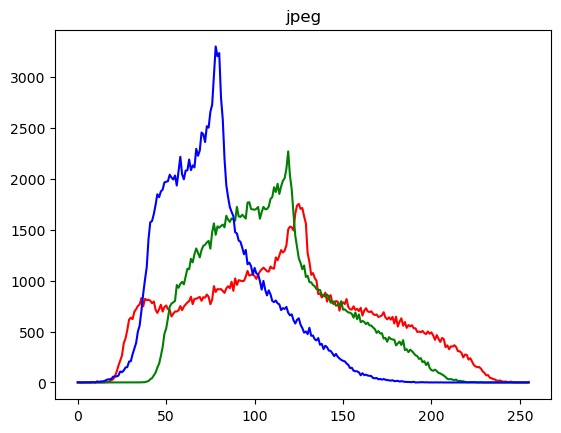

In [15]:


r_jpeg,g_jpeg,b_jpeg=rgb_components(jpeg_img)
n=r_jpeg.shape[0]
m=r_jpeg.shape[1]
#function to calculate the histograme of an image
def histo(img):
    return [np.count_nonzero(img==i) for i in range(256)]

r_histograme=histo(r_jpeg)
g_histograme=histo(g_jpeg)
b_histograme=histo(b_jpeg) 
plt.plot(np.arange(0,256,1),r_histograme,c="red")
plt.plot(np.arange(0,256,1),g_histograme,c="green")
plt.plot(np.arange(0,256,1),b_histograme,c="blue")
plt.title("jpeg")



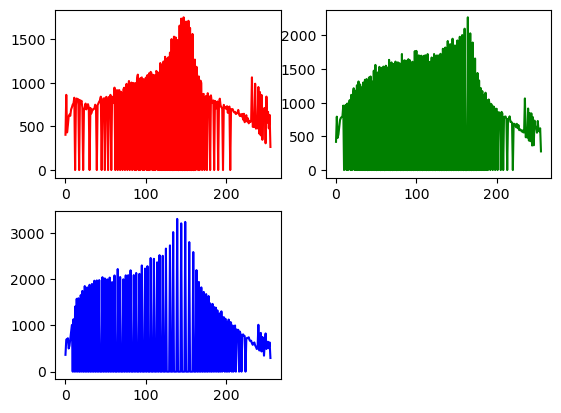

In [16]:
  
arr=new_distribution(r_jpeg)
r=map(r_jpeg,arr)
arr=new_distribution(g_jpeg)
g=map(g_jpeg,arr)
arr=new_distribution(b_jpeg)
b=map(b_jpeg,arr)


r_histo=histo(r)
g_histo=histo(g)
b_histo=histo(b)

plt.subplot(2,2,1)
plt.plot(np.arange(0,256,1),r_histo,c="red")
plt.subplot(2,2,2)
plt.plot(np.arange(0,256,1),g_histo,c="green")
plt.subplot(2,2,3)
plt.plot(np.arange(0,256,1),b_histo,c="blue")




Text(0.5, 1.0, 'equalized jpeg image')

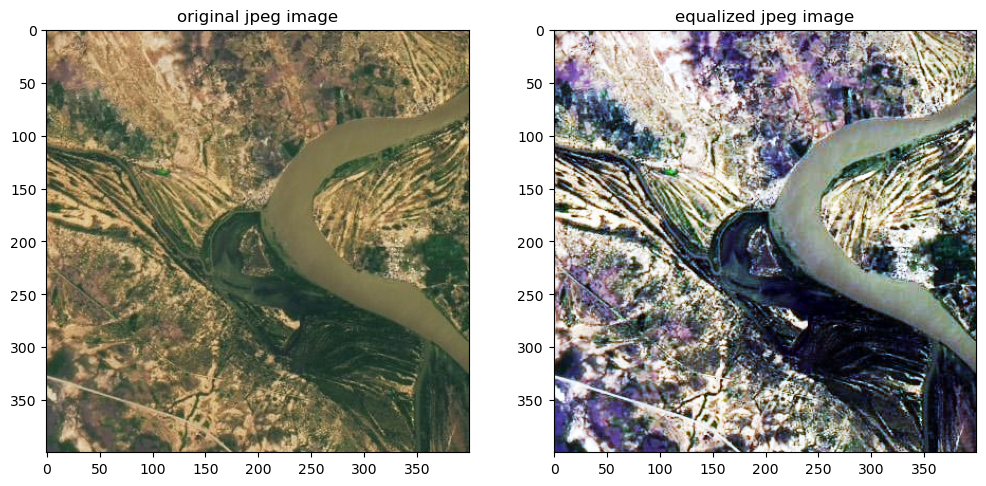

In [18]:
img=np.dstack([r,g,b])
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(jpeg_img)
plt.title("original jpeg image")
plt.subplot(1,2,2)
plt.imshow(img)
plt.title("equalized jpeg image")


<h3>Bmp</h3>

Text(0.5, 1.0, 'bmp')

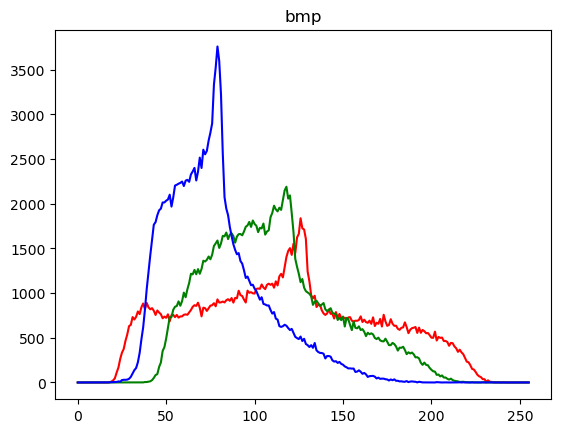

In [19]:
r_bmp,g_bmp,b_bmp=rgb_components(bmp_img)
n=r_bmp.shape[0]
m=r_bmp.shape[1]
#function to calculate the histograme of an image
def histo(img):
    return [np.count_nonzero(img==i) for i in range(256)]

r_histograme=histo(r_bmp)
g_histograme=histo(g_bmp)
b_histograme=histo(b_bmp) 
plt.plot(np.arange(0,256,1),r_histograme,c="red")
plt.plot(np.arange(0,256,1),g_histograme,c="green")
plt.plot(np.arange(0,256,1),b_histograme,c="blue")
plt.title("bmp")



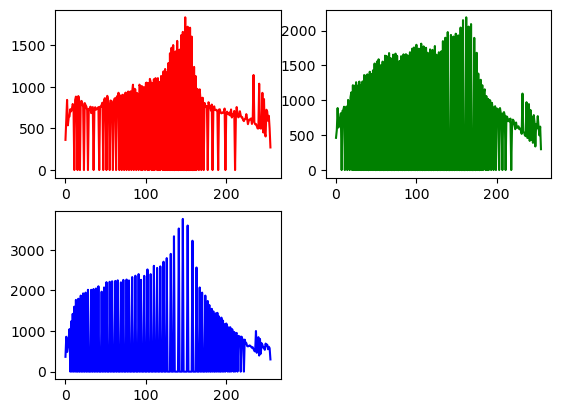

In [20]:
arr=new_distribution(r_bmp)
r=map(r_bmp,arr)
arr=new_distribution(g_bmp)
g=map(g_bmp,arr)
arr=new_distribution(b_bmp)
b=map(b_bmp,arr)


r_histo=histo(r)
g_histo=histo(g)
b_histo=histo(b)

plt.subplot(2,2,1)
plt.plot(np.arange(0,256,1),r_histo,c="red")
plt.subplot(2,2,2)
plt.plot(np.arange(0,256,1),g_histo,c="green")
plt.subplot(2,2,3)
plt.plot(np.arange(0,256,1),b_histo,c="blue")


Text(0.5, 1.0, 'equalized bmp image')

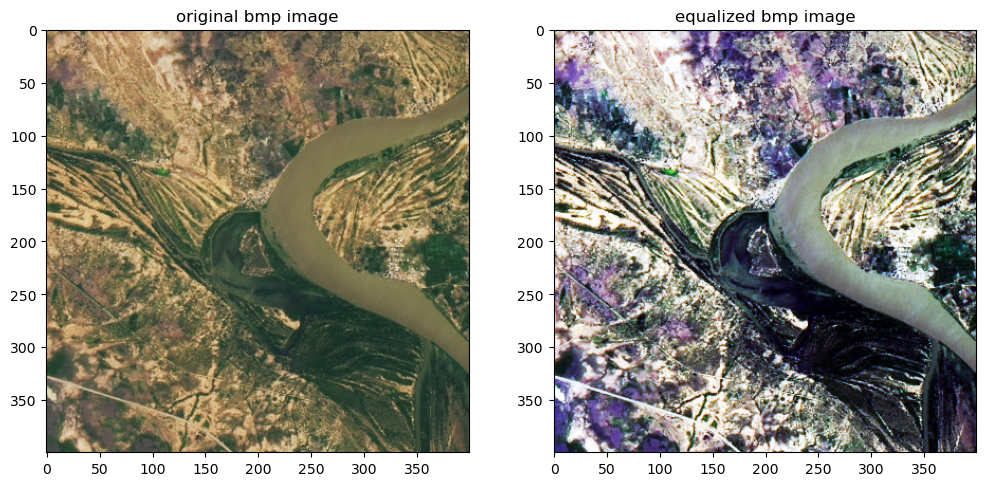

In [21]:
img=np.dstack([r,g,b])
plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
plt.imshow(bmp_img)
plt.title("original bmp image")
plt.subplot(1,2,2)
plt.imshow(img)
plt.title("equalized bmp image")

<h3>Gif</h3>

Text(0.5, 1.0, 'gif')

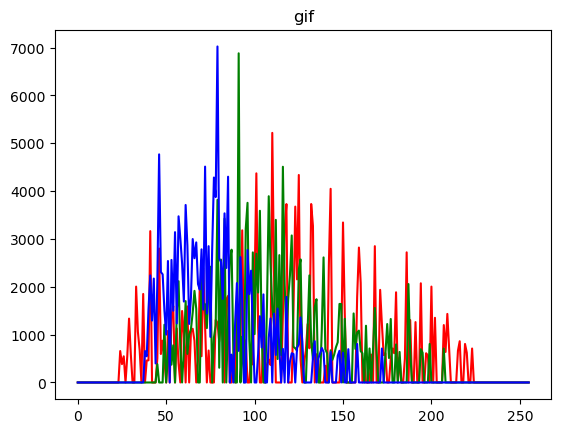

In [22]:
r_gif,g_gif,b_gif=rgb_components(gif_img)
n=r_gif.shape[0]
m=r_gif.shape[1]
#function to calculate the histograme of an image
def histo(img):
    return [np.count_nonzero(img==i) for i in range(256)]

r_histograme=histo(r_gif)
g_histograme=histo(g_gif)
b_histograme=histo(b_gif) 
plt.plot(np.arange(0,256,1),r_histograme,c="red")
plt.plot(np.arange(0,256,1),g_histograme,c="green")
plt.plot(np.arange(0,256,1),b_histograme,c="blue")
plt.title("gif")


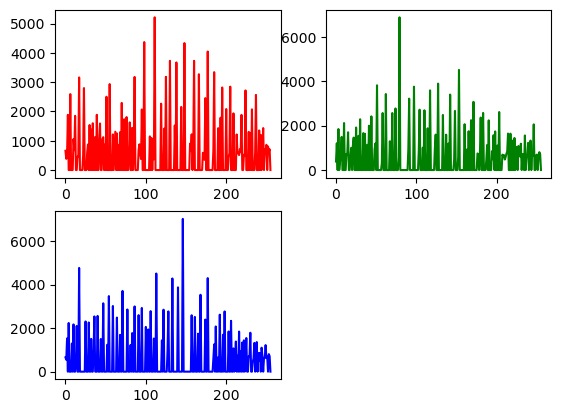

In [23]:
arr=new_distribution(r_gif)
r=map(r_gif,arr)
arr=new_distribution(g_gif)
g=map(g_gif,arr)
arr=new_distribution(b_gif)
b=map(b_gif,arr)


r_histo=histo(r)
g_histo=histo(g)
b_histo=histo(b)

plt.subplot(2,2,1)
plt.plot(np.arange(0,256,1),r_histo,c="red")
plt.subplot(2,2,2)
plt.plot(np.arange(0,256,1),g_histo,c="green")
plt.subplot(2,2,3)
plt.plot(np.arange(0,256,1),b_histo,c="blue")


Text(0.5, 1.0, 'equalized gif image')

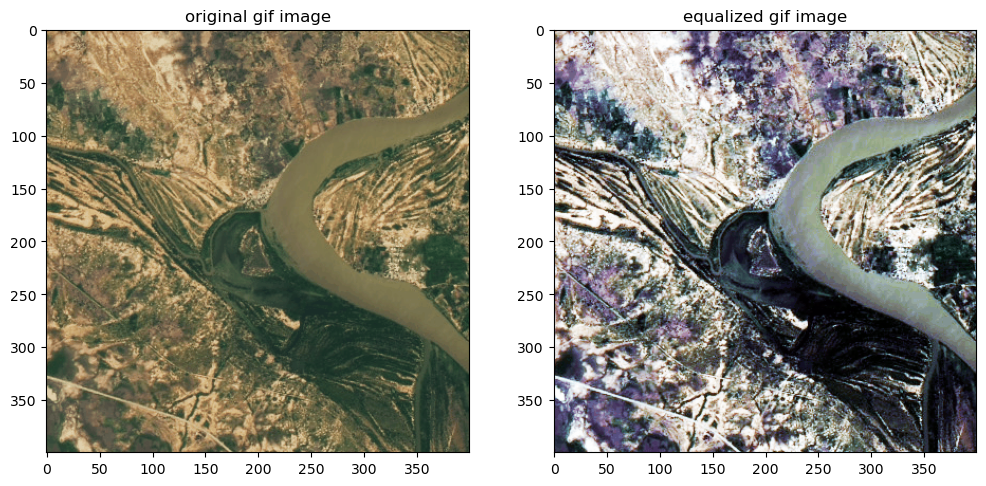

In [24]:
img=np.dstack([r,g,b])
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(gif_img)
plt.title("original gif image")
plt.subplot(1,2,2)
plt.imshow(img)
plt.title("equalized gif image")

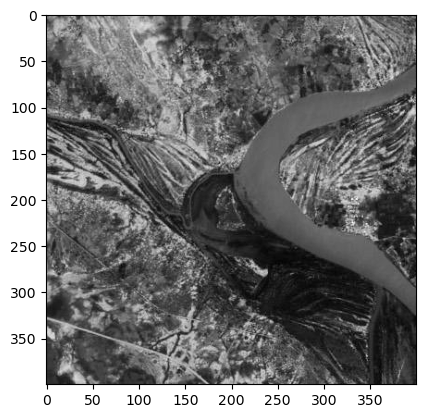

In [30]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

jpeg_gray=rgb2gray(jpeg_img)

plt.imshow(jpeg_gray,cmap="gray")

<h2>Linear filters</h2>
<h3>mean filter</h3>

In [31]:
def mean_filter(img):
    n=img.shape[0]
    m=img.shape[1]
    a=img.copy()
    filter=np.ones((3,3))
    for x in range(1,n-1):
        for y in range(1,m-1):
            a[x][y]=np.mean(np.multiply(img[x-1:x+2,y-1:y+2],filter))
    return a

def gauss(x,y,sigma=0.01):
    return (((1)/(2*np.pi*sigma**2))*(np.exp(-(x**2+y**2)/(2*sigma**2))))


def gauss_filter(shape=(3,3)):
    a=np.ones(shape)

    for x in range(a.shape[0]):
        for y in range(a.shape[1]):
   
            a[x][y]=gauss(x,y,0.001)
    return a


def filter_img(img):
    n=img.shape[0]
    m=img.shape[1]
    a=img.copy()
    filter=gauss_filter()

    for x in range(1,n-1):
        for y in range(1,m-1):
            
            a[x][y]=np.round(np.mean(np.multiply(img[x-1:x+2,y-1:y+2],filter)))
       
    return a

def median_filter(img):
    n=img.shape[0]
    m=img.shape[1]
    a=img.copy()
    for x in range(1,n-1):
        for y in range(1,m-1):
            temp=np.round(np.median(img[x-1:x+2,y-1:y+2].flatten()))
        
            a[x][y]=temp
    return a
def min_filter(img):
    n=img.shape[0]
    m=img.shape[1]
    a=img.copy()
    for x in range(1,n-1):
        for y in range(1,m-1):
            temp=np.min(img[x-1:x+2,y-1:y+2].flatten())
        
            a[x][y]=temp
    return a
    
gray_png=rgb2gray(png_image*255)

mean_filtred_img=mean_filter(gray_png)
gauss_filtred_img=filter_img(gray_png)
median_filtred_img=median_filter(gray_png)
min_filtred_img=median_filter(gray_png)







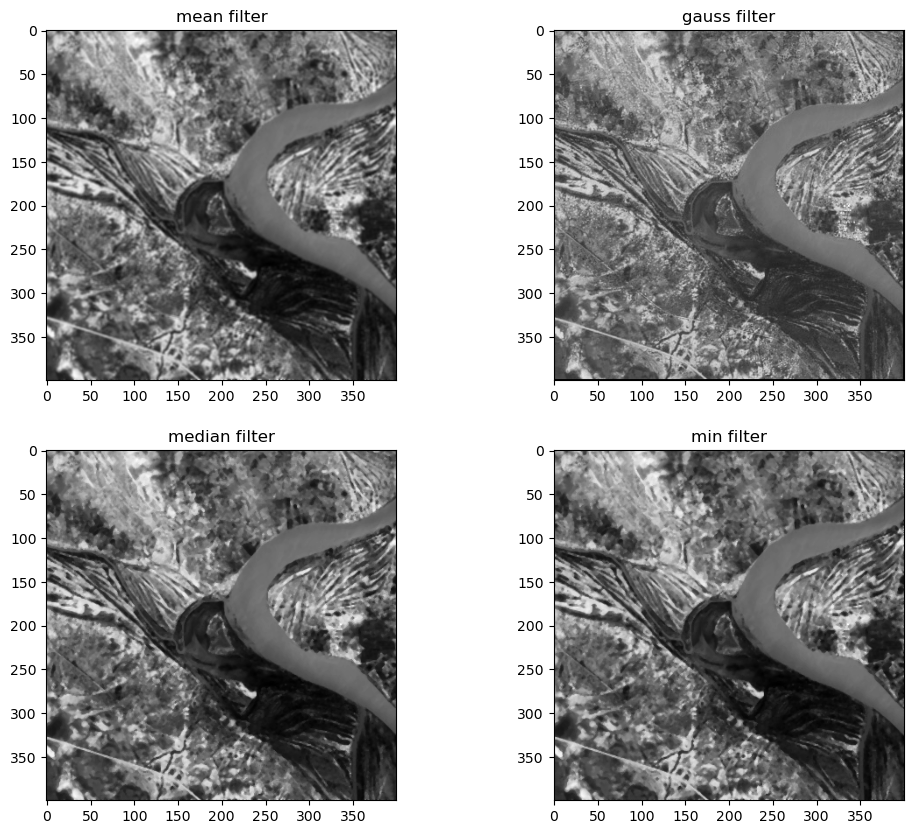

In [32]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title("mean filter")
plt.imshow(mean_filtred_img,cmap="gray")
plt.subplot(2,2,2)
plt.title("gauss filter")
plt.imshow(gauss_filtred_img,cmap="gray")
plt.subplot(2,2,3)
plt.title("median filter")
plt.imshow(median_filtred_img,cmap="gray")
plt.subplot(2,2,4)
plt.title("min filter")
plt.imshow(min_filtred_img,cmap="gray")

mse(png,jpeg): 90.04453325945286


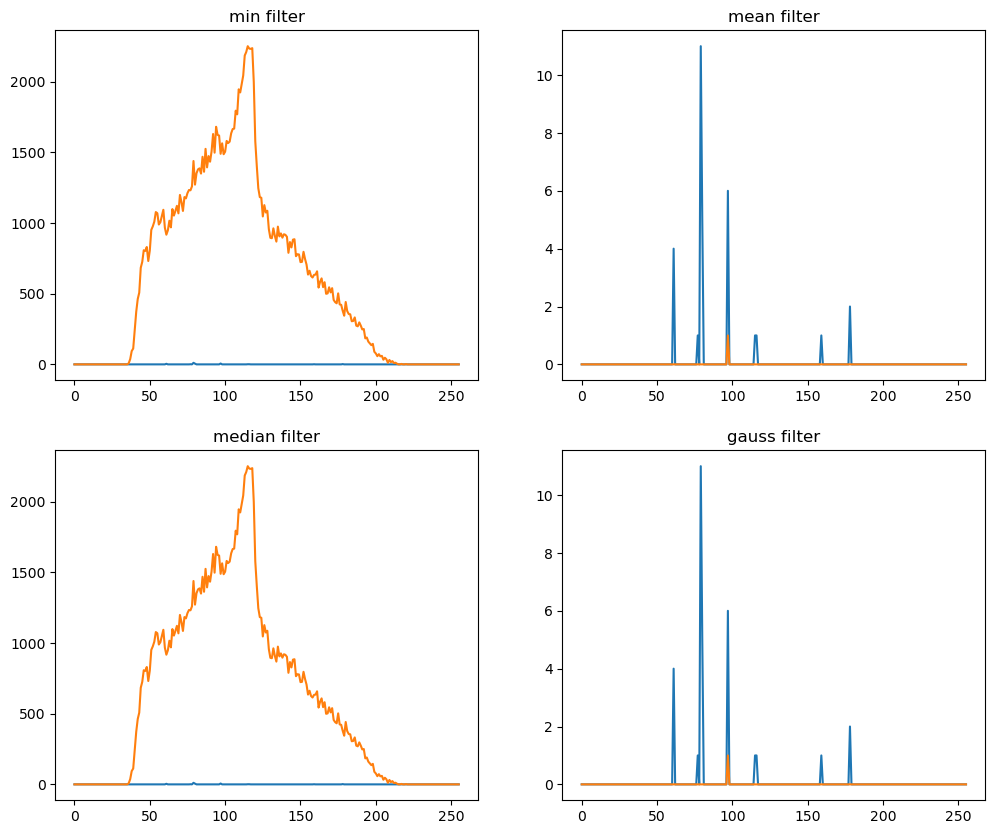

In [33]:

print("mse(png,jpeg):",mean_squard_error(gray_png,min_filtred_img))  
# print("mse(png,bmp):",mean_squard_error(png_image*255,bmp_img))  
# print("mse(png,tiff):",mean_squard_error(png_image*255,tiff_img))  
# print("mse(png,gif):",mean_squard_error(png_image*255,gif_img))  
gray_histo=histo(gray_png)
min_histo=histo(min_filtred_img)
mean_histo=histo(mean_filtred_img)
median_histo=histo(median_filtred_img)
gauss_histo=histo(gauss_filtred_img)

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title("min filter")
plt.plot(np.arange(0,256,1),gray_histo)
plt.plot(np.arange(0,256,1),min_histo)
plt.subplot(2,2,2)
plt.title("mean filter")
plt.plot(np.arange(0,256,1),gray_histo)
plt.plot(np.arange(0,256,1),mean_histo)
plt.subplot(2,2,3)
plt.title("median filter")
plt.plot(np.arange(0,256,1),gray_histo)
plt.plot(np.arange(0,256,1),median_histo)
plt.subplot(2,2,4)
plt.title("gauss filter")
plt.plot(np.arange(0,256,1),gray_histo)
plt.plot(np.arange(0,256,1),gauss_histo)